# Pressure and Temperature as Dry Ice Sublimates in VORANOL 360

Pressure and temperature plots along with some first-try analysis of solubility.

In [9]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import GasFlowMethods as GFM
from scipy.signal import medfilt
# from importlib import reload
# reload(GFM)

# user parameters
data_file = '../DATA/co2_p_in_parr/20190408-0417_co2_30-8g_v360_25mL.csv' # '../DATA/co2_p_in_parr/20190218-0303_co2_18-0g_v360_150g.csv'

# save parameters
save_folder = 'Figures/co2_p_in_parr/'

# plot parameters
ax_fs = 16
tk_fs = 12
t_fs = 20
lw = 2
ms = 4

## Useful Functions

In [4]:
def usb_2_actual_pressure(p_usb, lo_usb=-3, hi_usb=639, lo_cpu=1, hi_cpu=655, cpu2actual=1/0.895):
    """
    Converts pressure read during usb powering with Samsung 5V 2.0 A USB wall adapter to 
    predicted actual pressure based on empirical measurements, particularly on pp. 45 and 51
    """
    p_cpu = (hi_cpu-lo_cpu)/(hi_usb-lo_usb)*p_usb + (lo_cpu-lo_usb)
    p_actual = cpu2actual * p_cpu
    
    return p_actual

def dc_2_actual_pressure(p_dc, p_lo=0, p_hi=1500, cts_lo=207, cts_hi=1023, cts_lo_actual=208, cts_hi_actual=914):
    """
    Converts pressure read during DC powering with 
    predicted actual pressure based on empirical measurements based on calibration on pp. 64-65.
    """
    cts = (cts_hi-cts_lo)*(p_dc-p_lo)/(p_hi-p_lo) + cts_lo
    p_actual = (p_hi-p_lo)*(cts-cts_lo_actual)/(cts_hi_actual-cts_lo_actual) + p_lo
    
    return p_actual

def plot_p_T_vs_t(p, T, t, log_t=False, t_lim=None, save_plot=False,
                  save_path='', title='CO2(s) + Voranol 360 in Parr Reactor',
                  lw=2, ax_fs=18, t_fs=20, tk_fs=14, colors=['k','b'], line_styles=['-','--']):
    """
    Plots pressure and temperature on same plot as a function of time.
    Different vertical axes are used to keep pressure and temperature on similar scales.
    """
    # create plot
    fig, ax1 = plt.subplots()
    # plot vs. log time ?
    if log_t:
        ax1.semilogx(t, p, line_styles[0], label='p', color=colors[0], linewidth=lw)
    else:
        ax1.plot(t, p, line_styles[0], label='p', color=colors[0], linewidth=lw)
    # labels
    ax1.set_xlabel('time (s)', fontsize=ax_fs)
    ax1.set_ylabel('pressure (psi)', color=colors[0], fontsize=ax_fs)
    ax1.tick_params('y', colors=colors[0])
    ax1.set_title(title, fontsize=t_fs)
    
    # separate axis for temperature
    ax2 = ax1.twinx()
    # plot vs. log time ?
    if log_t:
        ax2.semilogx(t, T, line_styles[1], label='T', color=colors[1], linewidth=lw)
    else:
        ax2.plot(t, T, line_styles[1], label='T', color=colors[1], linewidth=lw)
    # labels
    ax2.set_ylabel('temperature (C)', color=colors[1], fontsize=ax_fs)
    ax2.tick_params('y', colors=colors[1])
    
    # set axis limits ?
    if t_lim is not None:
        plt.xlim(t_lim)
    # increase font size of tick labels
    ax1.tick_params(axis='both', which='major', labelsize=tk_fs)
    ax2.tick_params(axis='y', which='major', labelsize=tk_fs)
    fig.tight_layout()

    # save plot ?
    if save_plot:
        plt.savefig(save_path, bbox_inches="tight")
        
def plot_p_vs_t(p, t, log_t=False, log_p=False, p_lim=None, t_lim=None, save_plot=False,
                  save_path='', title='Pressure over Time: Voranol 360 w CO2',
                ms=4, ax_fs=18, t_fs=20, tk_fs=14, color='b'):
    fig, ax = plt.subplots()
    # logarithmic axes ?
    if log_t and log_p:
        ax.loglog(t, p, '.', color=color, markersize=ms)
    elif log_t:
        ax.semilogx(t, p, '.', color=color, markersize=ms)
    elif log_p:
        ax.semilogy(t, p, '.', color=color, markersize=ms)
    else:
        ax.plot(t, p, '.', color=color, markersize=ms)
    ax.set_xlabel('time (s)', fontsize=ax_fs)
    ax.set_ylabel('pressure (psi)', fontsize=ax_fs)
    ax.set_title(title, fontsize=t_fs)
    # limit viewing window ?
    if p_lim is not None:
        plt.ylim(p_lim)
    if t_lim is not None:
        plt.xlim(t_lim)
    # increase font size of tick labels
    ax.tick_params(axis='both', which='major', labelsize=tk_fs)
    fig.tight_layout()

    # save plot ?
    if save_plot:
        plt.savefig(save_path, bbox_inches="tight")
        
    return ax

## Load Data and Plot

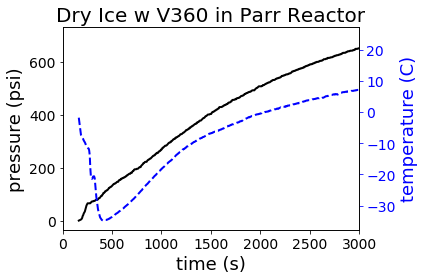

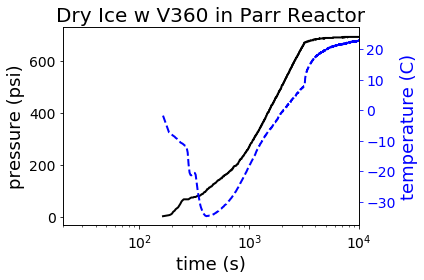

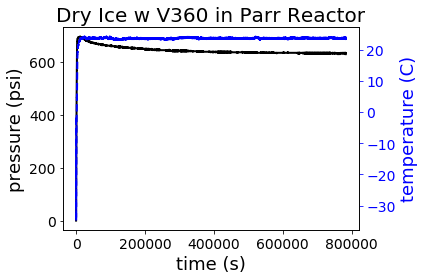

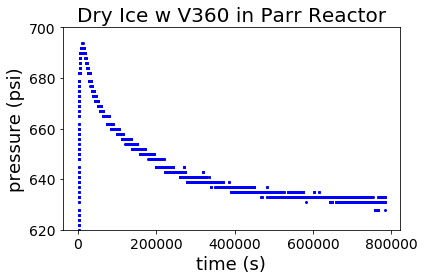

In [32]:
save_prefix = '20190408_30-8g'
title = 'Dry Ice w V360 in Parr Reactor'
# load data
data = pd.read_csv(data_file, delimiter=',', header=0)
p = data['p (psi)'] #dc_2_actual_pressure(data['p (psi)'])
T = data['T_thermo (C)']
t = data['t (s)']
# remove negative pressures
nonneg_p = p.values >= 0
p = p[nonneg_p]
T = T[nonneg_p]
t = t[nonneg_p]

# median filter
p = medfilt(p, kernel_size=11)

# plot 1: early times
save_path = save_folder + save_prefix + '_p_T_early.pdf'
plot_p_T_vs_t(p, T, t, save_plot=True, save_path=save_path, t_lim=[0,3000], title=title)

# plot 2: early times, semilog time
save_path = save_folder + save_prefix + '_p_T_semilogx.pdf'
plot_p_T_vs_t(p, T, t, save_plot=True, save_path=save_path, log_t=True, t_lim=[20, 10000], title=title)

# plot 3: full plot
save_path = save_folder + save_prefix + '_p_T_full.pdf'
plot_p_T_vs_t(p, T, t, save_plot=True, save_path=save_path, title=title)

# plot 4: plot of pressure over entire time
save_path = save_folder + save_prefix + '_p_full.pdf'
plot_p_vs_t(p, t, save_plot=True, save_path=save_path, p_lim=[620,700], title=title)

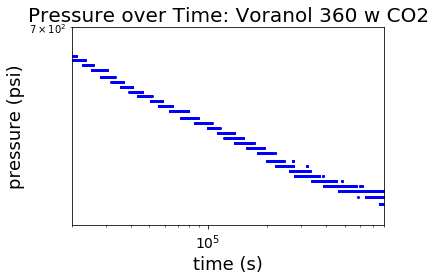

In [56]:
# plot 4: plot of pressure over entire time
plot_p_vs_t(p, t, p_lim=[620,700], log_p=True, log_t=True, t_lim=[20000,800000])

693.8927911275416

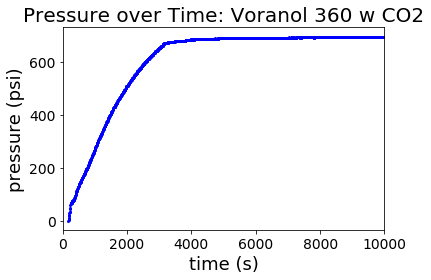

In [24]:
plot_p_vs_t(p, t, t_lim=[0,10000])
i1 = np.where(t.values > 5000)[0][0]
i2 = np.where(t.values<8000)[0][-1]
np.mean(data['p (psi)'].values[i1:i2])

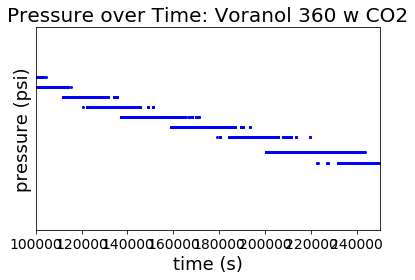

In [46]:
# plot 4: plot of pressure over entire time
plot_p_vs_t(p, t, p_lim=[630,670], log_p=True, t_lim=[100000,250000])

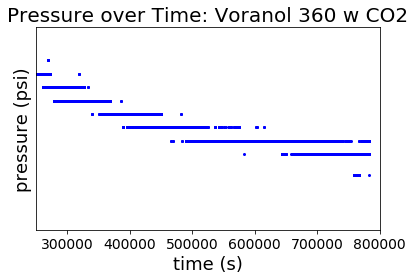

In [48]:
# plot 4: plot of pressure over entire time
plot_p_vs_t(p, t, p_lim=[620,650], log_p=True, t_lim=[250000,800000])

In [25]:
np.max(p)

694.0

## Fitting Leak to Exponential Decay

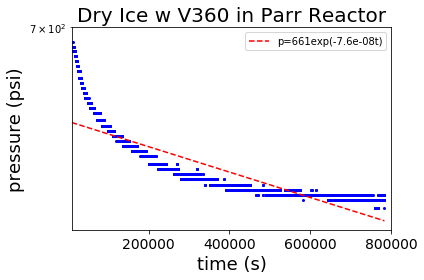

In [26]:
# exponential fit of pressure, time
exp_regime = t > 10000
t_exp = t[exp_regime]
p_exp = p[exp_regime]
a, b = np.polyfit(t_exp, np.log(p_exp), 1)
t_fit = np.linspace(np.min(t_exp), np.max(t_exp),100)
p_fit = np.exp(b)*np.exp(a*t_fit)

ax = plot_p_vs_t(p, t, t_lim=[10000, 800000], log_p=True, p_lim=[620,700], title=title)
ax.semilogy(t_fit, p_fit, 'r--', label='p=%dexp(%.2gt)' % (np.exp(b), a))
plt.legend(loc='best')

plt.savefig(save_folder + save_prefix + '_p_exp_fit.pdf', bbox_inches="tight")

## Interpolate Dow's Solubility Data

In [29]:
m_co2 = 30.82-60*0.004
m_poly = 25*1.084

p = GFM.m2p_v360(m_co2, m_poly, rho_poly=1.084, V=240, p0=30E5)
print("Pressure in gas phase should be %.1f bar = %d psi." % (1E-5*p, 14.5E-5*p))

Mass in gas phase = 26.25 g.
Mass in liquid phase = 4.33 g.
Pressure in gas phase should be 47.5 bar = 688 psi.


## Analyze Data to Determine Diffusivity

In [30]:
# initial density of co2 in Parr reactor
rho_CO2 = GFM.interpolate_rho_co2(p=p)


## Calculate pressure at each point in experiment (3/6/19)

In [101]:
experiment_times_min = np.array([21,21,27,29,33,37,46,50,54,54,58,2,5,9,12,16,19,20,20,20,30,34,38,39,44,53,57,0,3,6,14])
experiment_times_hr = np.array([11,11,11,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13])
start_min = 3
start_hr = 11

experiment_t = 3600*(experiment_times_hr-start_hr) + 60*(experiment_times_min-start_min)

In [103]:
experiment_t

array([1080, 1080, 1440, 1560, 1800, 2040, 2580, 2820, 3060, 3060, 3300,
       3540, 3720, 3960, 4140, 4380, 4560, 4620, 4620, 4620, 5220, 5460,
       5700, 5760, 6060, 6600, 6840, 7020, 7200, 7380, 7860])

In [102]:
from scipy.interpolate import interp1d

p_interp = interp1d(t, p)
experiment_p = p_interp(experiment_t)
print(experiment_p)

[440.06488166 440.06488166 438.23796034 437.39036827 430.63200219
 416.2776204  398.94050992 392.67677968 394.31728045 394.31728045
 389.84815864 390.84985836 385.77921959 378.13597734 378.13597734
 373.51274788 371.20113314 373.51274788 373.51274788 373.51274788
 366.57790368 364.97468701 363.11048159 360.79886686 356.54847848
 336.98923513 333.05949008 331.41898931 326.12464589 322.6572238
 316.16978891]


In [2]:
import numpy as np
p_psi = np.array([440.06488166, 440.06488166, 438.23796034, 437.39036827, 430.63200219,
 416.2776204,  398.94050992, 392.67677968, 394.31728045, 394.31728045,
 389.84815864, 390.84985836, 385.77921959, 378.13597734, 378.13597734,
 373.51274788, 371.20113314, 373.51274788, 373.51274788, 373.51274788,
 366.57790368, 364.97468701, 363.11048159, 360.79886686, 356.54847848,
 336.98923513, 333.05949008, 331.41898931, 326.12464589, 322.6572238,
 316.16978891])

print(p_psi/14.5)

[30.34930218 30.34930218 30.22330761 30.16485298 29.69875877 28.70880141
 27.51313862 27.08115722 27.1942952  27.1942952  26.88607991 26.95516265
 26.60546342 26.07834326 26.07834326 25.75949985 25.60007815 25.75949985
 25.75949985 25.75949985 25.28123474 25.17066807 25.04210218 24.88268047
 24.58955024 23.24063691 22.96962001 22.85648202 22.49135489 22.25222233
 21.80481303]
